<a id='section-0'></a>
<h1 style="color:#ff1a75;">World's Best Cities for People and the Planet</h1>

<h3 style="color:#ff66ff;">Ranking of cities on social, environmental and economic factors</h3>

---

<h2 style="color:#33ccff;">Table of Contents:</h2>
<ol>
    <li><a href="#section-1" style="color:#0000ff;">Overview</a></li>
    <li><a href="#section-2" style="color:#0000ff;">Importing Necessary Libraries</a></li>
    <li><a href="#section-3" style="color:#0000ff;">Data Loading and Pre-Processing</a></li>
    <li><a href="#section-4" style="color:#0000ff;">Exploratory Data Analysis</a></li>
        <ol>
            <li><a href="#section-4.1" style="color:#0000ff;">Count of Occurence of Each Continent</a></li>
            <li><a href="#section-4.2" style="color:#0000ff;">Top10 Overall Ranked Coutries</a></li>
            <li><a href="#section-4.3" style="color:#0000ff;">Top Overall Ranked Indian Cities</a></li>
            <li><a href="#section-4.4" style="color:#0000ff;">Top5 Overall Ranked Cities For Each Country</a></li>
            <li><a href="#section-4.5" style="color:#0000ff;">Overall Ranking of Countries Across The Globe</a></li>
        </ol>
    <li><a href="#section-99" style="color:#0000ff;">Thank You</a></li>
</ol>

---

<a id='section-1'></a>
<h1 style="color:#ff1a75;">Overview</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>


<a id='section-2'></a>
<h1 style="color:#ff1a75;">Importing Necessary Libraries</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import plotly.express as px

import os

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<a id='section-3'></a>
<h1 style="color:#ff1a75;">Data Loading and Pre-Processing</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [2]:
df = pd.read_csv('../input/worlds-best-cities-for-people-and-the-planet/GreenCities-Data.csv')

In [3]:
df.head()

,city,People,Planet,Profit,Overall,Country,Continent
0,Zurich,27,1,5,1,Switzerland,Europe
1,Singapore,48,12,1,2,Singapore,Asia
2,Stockholm,14,2,10,3,Sweden,Europe
3,Vienna,4,4,14,4,Austria,Europe
4,London,37,9,3,5,U.K.,Europe


<p style="color:#000066; font-size:16px;">Our dataframe contains 7 columns. Out of these <b>7</b>, <b>4</b> are of numeric type and <b>3</b> are of object type.
<br>Let's check if the datatype is same or if some <b>type casting</b> is required from our end.</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       100 non-null    object
 1   People     100 non-null    int64 
 2   Planet     100 non-null    int64 
 3   Profit     100 non-null    int64 
 4   Overall    100 non-null    int64 
 5   Country    100 non-null    object
 6   Continent  100 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


<p style="color:#000066; font-size:16px;">Luckily no explicit type casting is required!!!</p>

In [5]:
df.isnull().sum()

city         0
People       0
Planet       0
Profit       0
Overall      0
Country      0
Continent    0
dtype: int64

<p style="color:#000066; font-size:16px;">There are no null values in our dataset so no cleaning is required.</p>

<a id='section-4'></a>
<h1 style="color:#ff1a75;">Exploratory Data Analysis</h1>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [6]:
df.columns

Index(['city', 'People', 'Planet', 'Profit', 'Overall', 'Country',
       'Continent'],
      dtype='object')

In [7]:
label_font = {'fontsize': '15', 'fontweight' : '3'}
title_font = {'fontsize': '25', 'fontweight' : '5'}

In [8]:
continent_counts = pd.DataFrame(df['Continent'].value_counts())

<a id='section-4.1'></a>
<h3 style="color:#ff1a75;">Count of Occurence of Each Continent</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

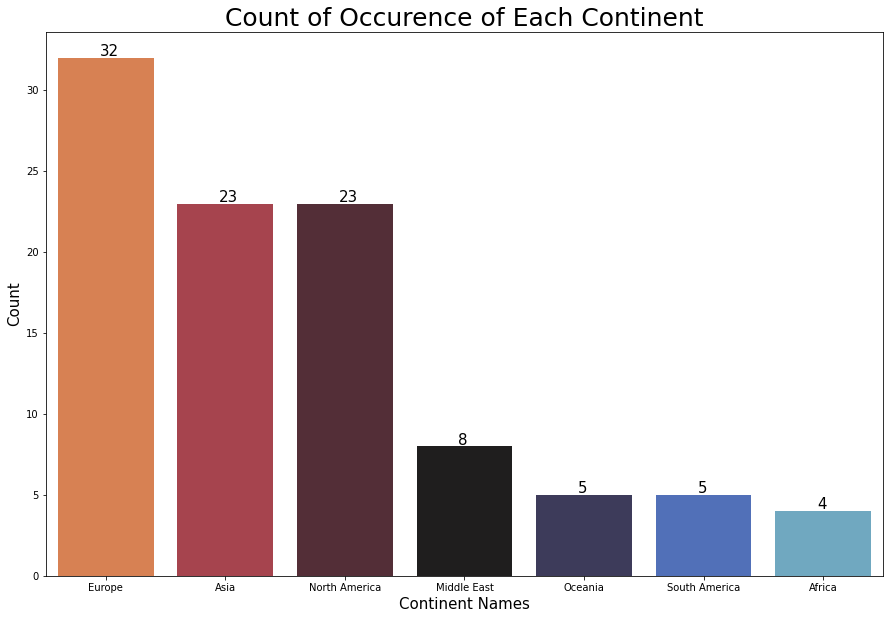

In [9]:

fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot();
sns.barplot(x=continent_counts.index,y=continent_counts['Continent'],palette='icefire_r')
i=0
for val in continent_counts['Continent']:
    ax.text(i-0.05, val+0.1, f'{val}', fontdict = label_font)
    i+=1
plt.xlabel('Continent Names',fontdict = label_font);
plt.ylabel('Count',fontdict = label_font);
plt.title('Count of Occurence of Each Continent',fontdict = title_font);

<p style="color:#000066; font-size:16px;">Europe clearly is the winner here. So there are 32 European Countries in our dataset out of 100 data entires.<br>
This means that European Countries constitute 32% of our dataset.</p>

<p style="color:#000066; font-size:16px;">Let's see the Top10 Countries based on the Overall Ranking</p>

In [10]:
top10 = df[:10]

<a id='section-4.2'></a>
<h3 style="color:#ff1a75;">Top10 Overall Ranked Coutries</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

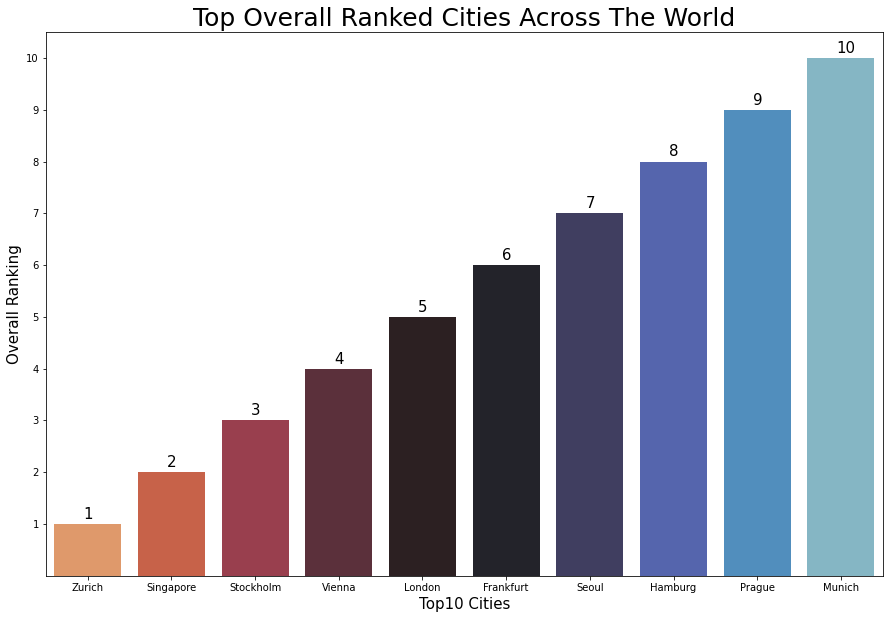

In [11]:
fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot();
sns.barplot(x='city',y='Overall',data = top10,palette='icefire_r');
i=0
for val in top10['Overall']:
    ax.text(i-0.05, val+0.1, f'{val}', fontdict = label_font)
    i+=1
plt.xlabel('Top10 Cities',fontdict = label_font);
plt.ylabel('Overall Ranking',fontdict = label_font);
plt.title('Top Overall Ranked Cities Across The World',fontdict = title_font);
plt.yticks([i for i in range(1,11)]);

<p style="color:#000066; font-size:16px;">Since I am from India, I will initially apply EDA to data specific to India then generalize to other countries if possible.<br>
This is because I understand Indian Geography and it might help me make generalizations.</p>

In [12]:
india = df[df['Country']=='India']

In [13]:
india.shape

(5, 7)

<p style="color:#000066; font-size:16px;">So we only have 5 Indian Cities, let's see their overall rank.</p>

<a id='section-4.3'></a>
<h3 style="color:#ff1a75;">Top Overall Ranked Indian Cities</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

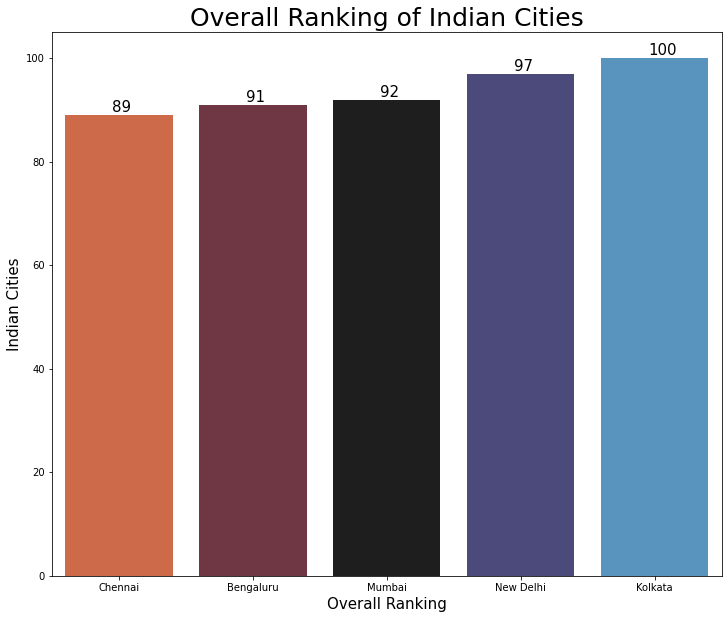

In [14]:
fig = plt.figure(figsize=(12,10));
ax = fig.add_subplot();
sns.barplot(y='Overall',x='city',data = india,palette='icefire_r');
i=0
for val in india['Overall']:
    ax.text(i-0.05, val+0.5, f'{val}', fontdict = label_font)
    i+=1
plt.xlabel('Overall Ranking',fontdict = label_font);
plt.ylabel('Indian Cities',fontdict = label_font);
plt.title('Overall Ranking of Indian Cities',fontdict = title_font);

<p style="color:#000066; font-size:16px;">Chennai is the best city in India with an overall rank of 89.<br>
Kolkata being the worst with an Overall Ranking of 100.</p>

<p style="color:#000066; font-size:16px;">Let's try to create a general function to plot the top5 cities of each country.</p>

In [15]:
def top5_cities(Country):
    top5 = df[df['Country']==Country][:5]
    if top5.shape[0] > 1:
        Country = Country[0].upper() + Country[1:]
        fig = plt.figure(figsize=(8,6));
        ax = fig.add_subplot()
        sns.barplot(x='city',y='Overall',data = top5,palette='icefire_r');
        i=0
        for val in top5['Overall']:
            ax.text(i-0.05, val//2 + 0.25, f'{val}', fontdict = {'size': '15', 'weight' : '3','color':'#ffffff'})
            i+=1
        plt.xlabel(f'{Country} Cities',fontdict = label_font);
        plt.ylabel('Top5 Ranking',fontdict = label_font);
        plt.title(f'Top5 Ranking of {Country} Cities',fontdict = title_font);
        plt.show();

In [16]:
countries = df['Country'].unique()

<a id='section-4.4'></a>
<h3 style="color:#ff1a75;">Top5 Overall Ranked Cities For Each Country</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

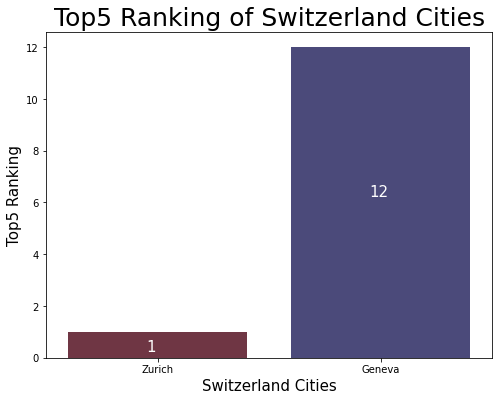

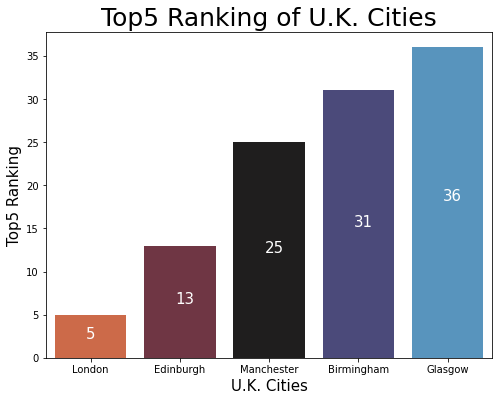

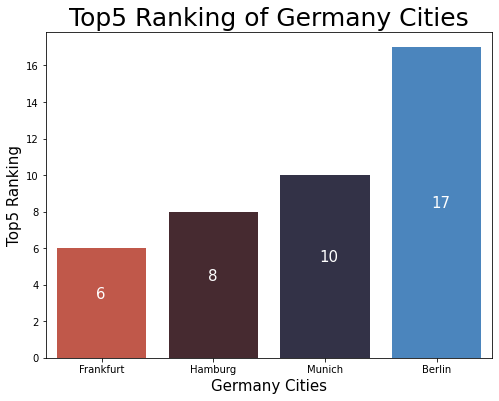

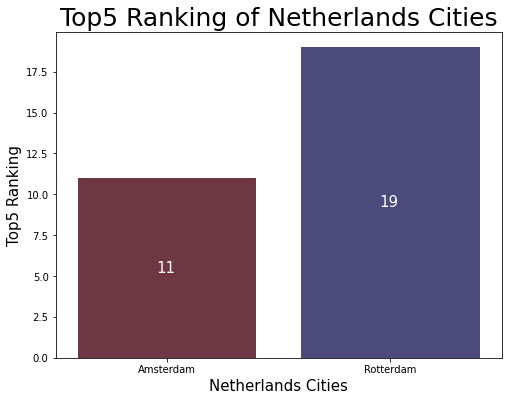

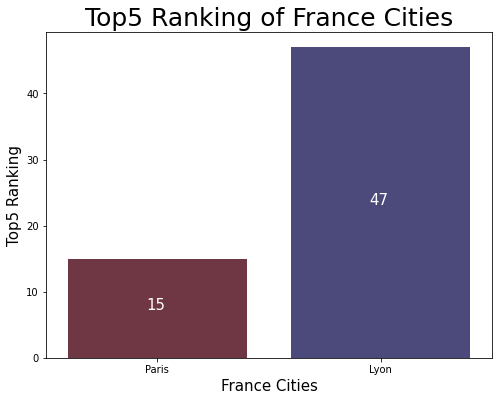

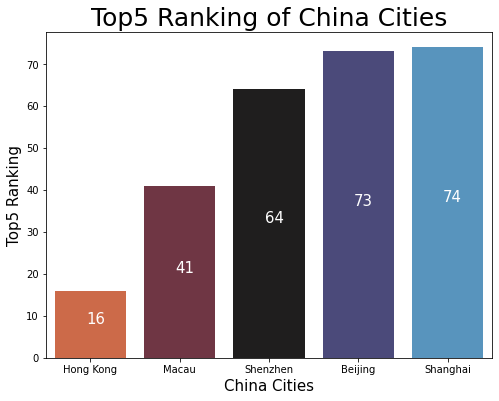

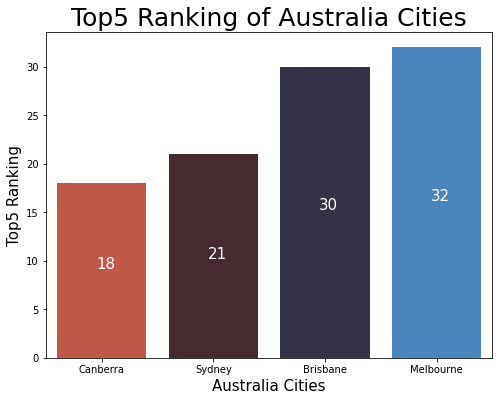

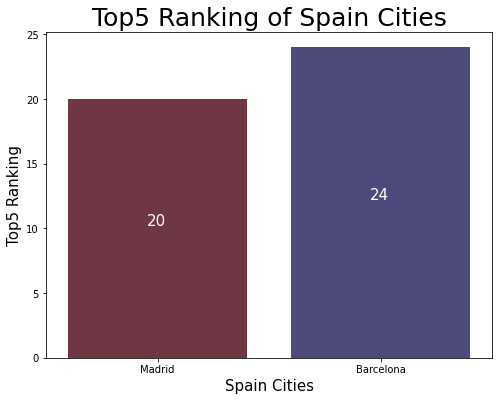

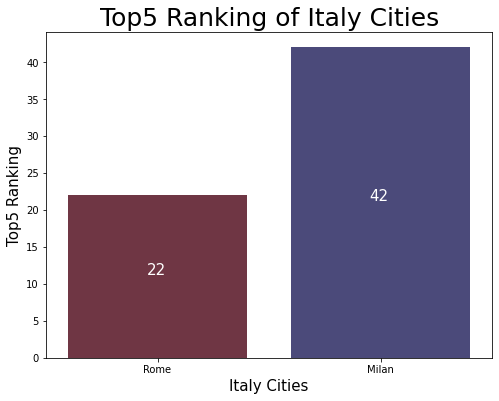

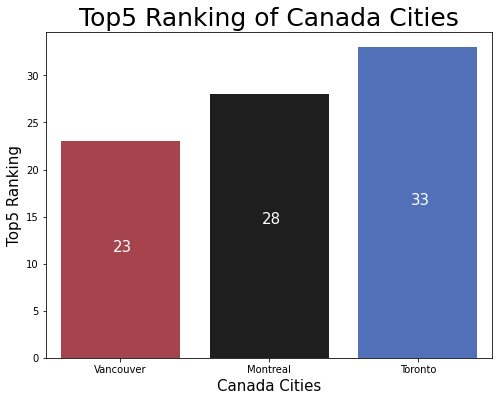

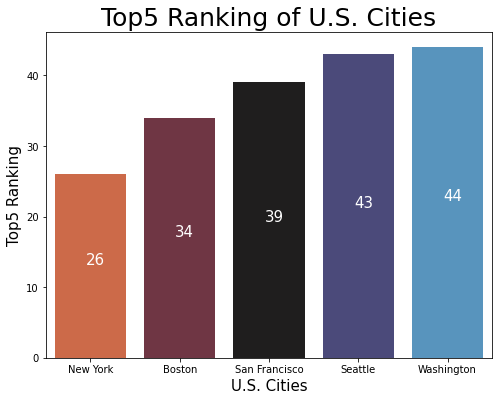

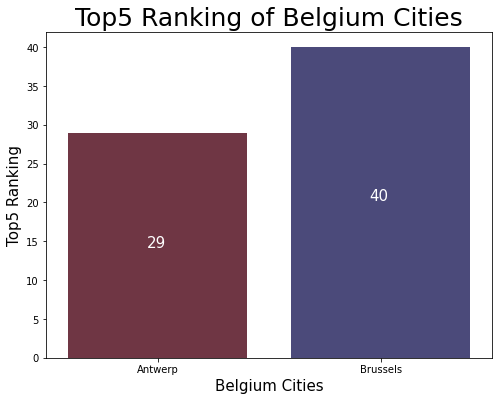

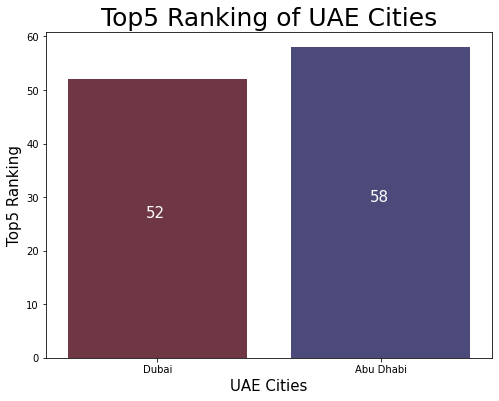

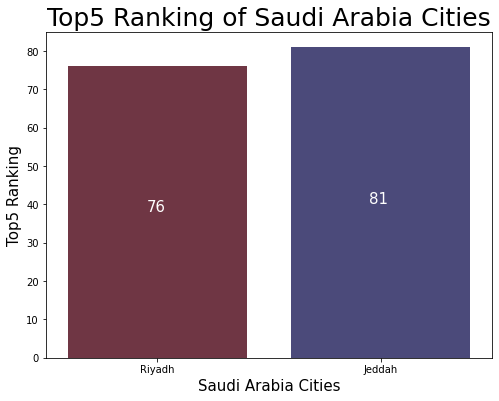

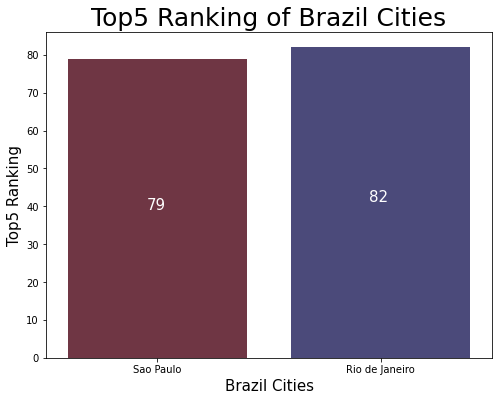

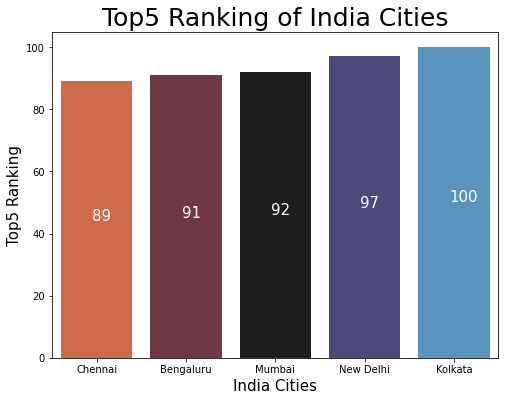

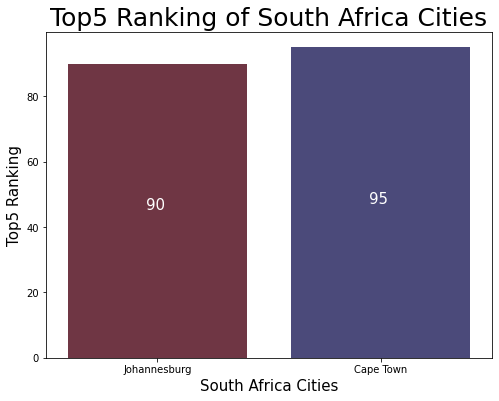

In [17]:
for country in countries:
    top5_cities(country)

In [18]:
 def world_map(col=None,title=None):
    '''
    Function to plot a choropleth world Map.
    Arguments required:
    1. Column Name for which distribution is to be plotted.
    2. The Title of the Graph.
    '''
    fig = px.choropleth(df,
                  locations='Country',
                  locationmode='country names',
                  hover_name='Country',
                  color=col,
                  color_continuous_scale='icefire_r')

    fig.update_layout(title_text=title)
    fig.show()

<a id='section-4.5'></a>
<h3 style="color:#ff1a75;">Overall Ranking of Countries Across The Globe</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [19]:
world_map(col='Overall',title='Overall Ranking of Countries Across The Globe')


<p style="color:#000066; font-size:24px;"><b>Try Hovering over the map!!!</b></p>


<p style="color:#000066; font-size:16px;">We can see that many african and Asian Countries (Iran,Iraq,Syria,Afghanistan etc) are missing on this dataset and one of the reasons for it is that the overall ranking is based on various factors and the missing countries did not match all the criteria required for this ranking. This reason is also mentioned in the description of the dataset.</p>


<p style="color:#ff0000; font-size:16px;">Work In Progress!!!</p>
<img src="https://cdn-icons-png.flaticon.com/512/5038/5038308.png">

<a id='section-99'></a>
<h1 style="color:#ff1a75;">Thank You!!!</h1>

<h3 style="color:#ff66ff;">If you liked the notebook, do upvote it!!!</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

---